In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# sin2
class Sin2(nn.Module):
    def __init__(self):
        super(Sin2, self).__init__()
        # -- must register this as parameter
        self.w = torch.nn.Parameter(torch.rand(2, 1))

    # xb is a bacth of x_i, i.e., x1, x2, .., xn
    def forward(self, input):
        output = torch.sin(torch.matmul(input, self.w))
        # output.requires_grad=True
        return output
        
# generate a sample batch: 20*2 input tensors, 20*2 output tensors
# there are 20 samples in a batch
def gen_samples(N, k):
    x = np.random.uniform(-10, 10, [N, 2])
    y = np.sin(np.matmul(x, k))
    xb = torch.tensor(x.astype('float32'))
    yb = torch.tensor(y.astype('float32'))
    return xb, yb

# test 1 sample
sn = Sin2()
print(sn.w)
list1 = [12, 40]
k = np.array(list1).transpose().reshape(2,1)
print(k, k.shape)
xb, yb = gen_samples(1, k)
print(xb)
print("sin2 = ", sn(xb), 'y =',yb)

# generate training sample
PI = 3.14159
list1 = [12, 40]
# k = np.array(list1).transpose().reshape(2,1)
k = np.array([[PI/3], [PI/5]])
xb, yb = gen_samples(100, k)

Parameter containing:
tensor([[0.4955],
        [0.5342]], requires_grad=True)
[[12]
 [40]] (2, 1)
tensor([[-2.0364, -6.2779]])
sin2 =  tensor([[0.9394]], grad_fn=<SinBackward0>) y = tensor([[0.7870]])


Before training: Parameter containing:
tensor([[0.7877],
        [0.7384]], requires_grad=True) vs [[1.04719667]
 [0.628318  ]]
After training: Parameter containing:
tensor([[1.0453],
        [0.6280]], requires_grad=True) vs. [[1.04719667]
 [0.628318  ]]


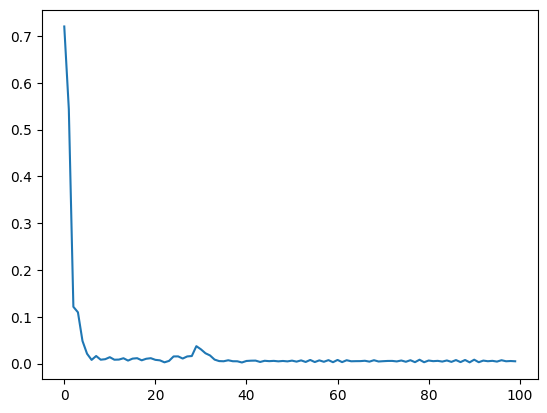

In [6]:
# train the model once, and return the loss in this epoch
def train_epoch(batch_in, batch_out, optimizer, model):
    input = batch_in
    output = model(input)
    loss = nn.functional.l1_loss(output, batch_out)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

# sn is an instance of the model
sn = Sin2()

# optimizer for training
optimizer = torch.optim.SGD(sn.parameters(), lr = 1e-3, 
                            weight_decay = 1e-3, momentum = 0.9)


print('Before training:', sn.w, 'vs', k, )

# ep records losses during training
ep = []
for i in range(1000):
  # xb, yb = gen_samples(k)
  loss = train_epoch(xb, yb, optimizer, sn)
  if i % 10 == 0:
      # -- you can not plot tensors. Need to
      # change them into np vectors
      # ep.append(loss.detach().numpy())
      ep.append(loss.data)

# show the trained parameters and plot losses
print('After training:', sn.w, 'vs.', k)
plt.figure()
plt.plot(np.arange(len(ep)), ep)